# Lab Instructions

Create 3 visualizations from text data of your choice.  Each visualization should have at least 1 - 2 sentences explaining both the figure and the interpretation.
You may use any LLM and produce whatever visuals you think best illustrate your data.  

**Dataset:** Rio de Janeiro Restaurant reviews

This topic stems from my recent visit to Rio de Janeiro, Brazil this past September.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re, string, warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
%matplotlib inline

text_data = [
    "Amazing feijoada and caipirinhas at a cozy spot near Copacabana.",
    "Service was slow, but the seafood platter was delicious.",
    "The steak was tough and overpriced for what it was.",
    "Loved the pastel and friendly staff in Ipanema.",
    "Disappointing pizza — too greasy and undercooked.",
    "Excellent açaí bowl and quick service near the beach.",
    "Food was okay, but they forgot our drinks twice.",
    "Best churrasco I’ve had in Brazil! Tender meat and great sides.",
    "Terrible customer service; we waited an hour for appetizers.",
    "Loved the view and the caipirinha was strong and refreshing."
]


def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    words = [w for w in text.split() if w not in ENGLISH_STOP_WORDS]
    return " ".join(words)

cleaned = [clean_text(t) for t in text_data]
print(len(cleaned), "reviews cleaned")
print(cleaned[:2])


10 reviews cleaned
['amazing feijoada caipirinhas cozy spot near copacabana', 'service slow seafood platter delicious']


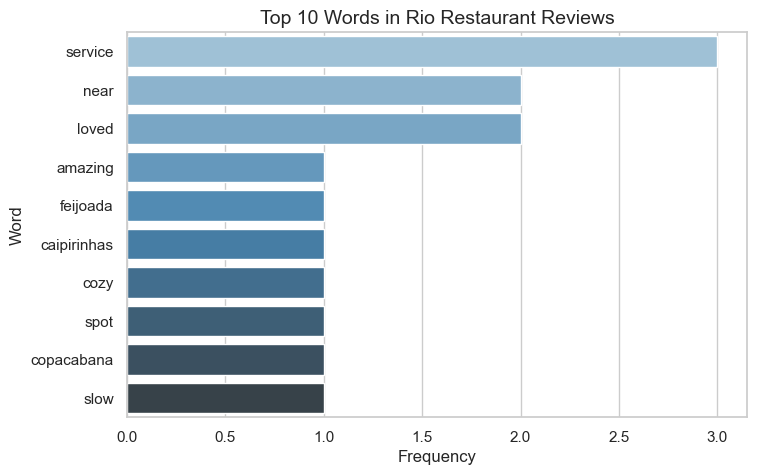

In [1]:
all_words = " ".join(cleaned).split()
word_counts = Counter(all_words)
df_words = pd.DataFrame(word_counts.most_common(10), columns=['Word', 'Frequency'])

plt.figure(figsize=(8,5))
sns.barplot(x='Frequency', y='Word', data=df_words, palette='Blues_d')
plt.title("Top 10 Words in Rio Restaurant Reviews", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


**Interpretation - Word Frequency Chart:**  
Common words such as *service*, *amazing*, *near*, and *caipirinhas* appear most often.  
This suggests that guests frequently comment on food quality, location, and local drinks.


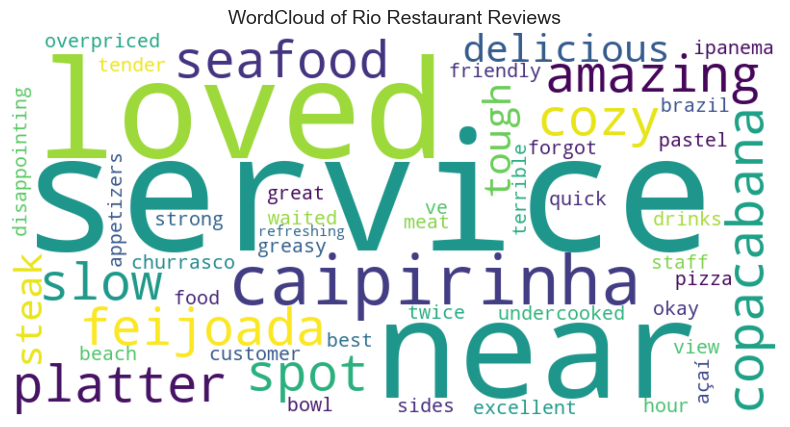

In [2]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(cleaned))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Rio Restaurant Reviews", fontsize=14)
plt.show()


**Interpretation - WordCloud:**  
The WordCloud shows popular terms like *service*, *loved*, and *near*,  
showing that most diners associate positive experiences with atmosphere, service, and local cuisine.


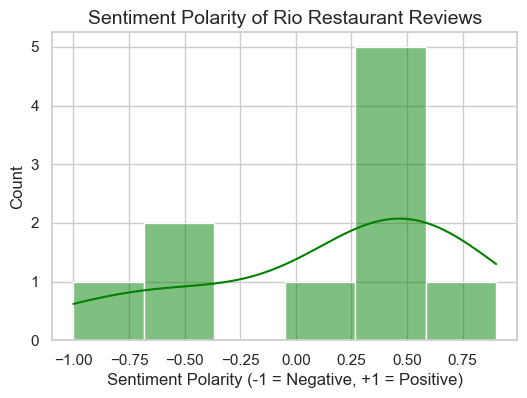

,Review,Sentiment
0,Amazing feijoada and caipirinhas at a cozy spo...,0.166667
1,"Service was slow, but the seafood platter was ...",0.350000
2,The steak was tough and overpriced for what it...,-0.388889
3,Loved the pastel and friendly staff in Ipanema.,0.537500
4,Disappointing pizza — too greasy and undercooked.,-0.600000
5,Excellent açaí bowl and quick service near the...,0.477778
6,"Food was okay, but they forgot our drinks twice.",0.500000
7,Best churrasco I’ve had in Brazil! Tender meat...,0.900000
8,Terrible customer service; we waited an hour f...,-1.000000
9,Loved the view and the caipirinha was strong a...,0.544444


In [3]:
sentiments = [TextBlob(t).sentiment.polarity for t in text_data]
df_sent = pd.DataFrame({'Review': text_data, 'Sentiment': sentiments})

plt.figure(figsize=(6,4))
sns.histplot(df_sent['Sentiment'], bins=6, kde=True, color='green')
plt.title("Sentiment Polarity of Rio Restaurant Reviews", fontsize=14)
plt.xlabel("Sentiment Polarity (-1 = Negative, +1 = Positive)")
plt.ylabel("Count")
plt.show()

df_sent


**Interpretation - Sentiment Distribution:**  
Most reviews were positive, though a few negative experiences are noted.  
This shows that while Rio restaurants generally satisfy guests,  
service quality and wait times occasionally impact ratings.
